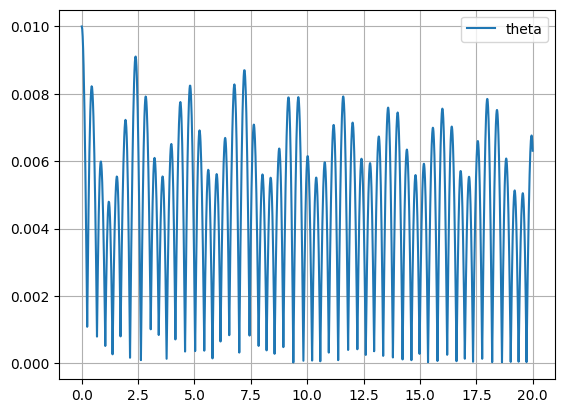

0.004290207373063254


In [50]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


p = 1
g = 9.81
al = 0.3
ω=2.5*np.pi*2
ua = ω**2 * 0.0035
R = 1
m = 1


e = ( 1 - (p**2 * R/g)*(1 - np.cos(2*al)))

def theta_derivates(t,x):
    th = x[0]
    om = x[1]
    y = -p**2 * ((ua*np.cos(ω*t)/g)*np.cos(al - np.sign(x[0])*x[0]) + np.sign(x[0])*np.sin(al - np.sign(x[0])*x[0]))
    return [x[1], y]

def hit_ground(t,x):
    return x[0]
hit_ground.terminal = True
hit_ground.direction = -1


t_evals = np.linspace(0,20,1000)
t=0
i=0
y1 = [0.01,0.00]
solution0 = np.empty((0))
solution1 = np.empty((0))
t_vals = np.empty(0)
t_array = np.arange(0,t_evals[-1], 0.01)
while t<t_evals[-1]:
    sol =solve_ivp(theta_derivates, t_span=[t,t_evals[-1]], y0=y1, events = [hit_ground], t_eval=np.linspace(t, t_evals[-1], 1000))
    t_vals = np.concatenate([t_vals, sol.t])
    solution0 = np.concatenate([solution0, sol.y[0,:]])
    solution1 = np.concatenate([solution1, sol.y[1,:]])
    y1[0] = sol.y[0,-1]
    y1[1] = -e*sol.y[1,-1]
    t = sol.t[-1]
    i+=1



plt.plot(t_vals, solution0, label = 'theta')
#plt.plot(t_vals, 0.1*(np.cos(ω*t_vals)), label = 'driving frequency')
#plt.plot(t_vals, solution1, label = 'theta_dot')
plt.legend()
plt.grid()
plt.show()
print(np.mean(solution0))

AssertionError: 